In [43]:
from graphviz import Digraph

In [50]:
class BST:
    """
       A class representing a node in a Binary Search Tree (BST).

       Each node contains a value and pointers to its left and right children.
    """
    def __init__(self, value:int) -> None:
        self.value=value
        self.left=None
        self.right=None

    # iterative approach
    def insert(self, value:int):
        """
       Check if a given value exists in the Binary Search Tree.

       Parameters:
           value (int): The value to search for.

       Returns:
           bool: True if the value exists in the tree, False otherwise.
        """
        current_node=self # start from root
        while True:
            if value < current_node.value:
                if current_node.left is None:
                    current_node.left = BST(value)
                    break
                else:
                    current_node = current_node.left # move to the left child
            else:
                if current_node.right is None:
                    current_node.right = BST(value)
                    break
                else:
                    current_node = current_node.right # move to the right child
        return self

    # iterative approach
    def contains(self, value:int) -> bool:
        current_node=self
        while current_node.value is not None:
            if value==current_node.value:
                return True
            if value<current_node.value:
                current_node = current_node.left # move to the left
            else:
                current_node = current_node.right
        return False

    def inorder(self, tree,array=None):
        if array is None:
            array=[]
        if tree is not None:
            self.inorder(tree.left,array) # Visit left subtree
            array.append(tree.value)
            self.inorder(tree.right,array)
        return array

    def preorder(self, tree,array=None):
        if array is None:
            array=[]
        if tree is not None:
            array.append(tree.value)
            self.preorder(tree.left,array)
            self.preorder(tree.right,array)
        return array

    def postorder(self, tree,array=None):
        if array is None:
            array=[]
        if tree is not None:
            self.postorder(tree.left,array)
            self.postorder(tree.right,array)
            array.append(tree.value)
        return array

    def visualize(self, dot=None):
        """Visualize the BST using Graphviz and display directly in Jupyter Notebook."""
        dot = Digraph()

        # Stack-based DFS traversal to avoid recursion depth issues
        stack = [self]
        while stack:
            node = stack.pop()

            # Create a node in the graph
            dot.node(str(node.value), str(node.value))

            # Add left child
            if node.left:
                dot.edge(str(node.value), str(node.left.value), label="L", tailport="sw", headport="n")
                stack.append(node.left)

            # Add right child
            if node.right:
                dot.edge(str(node.value), str(node.right.value), label="R", tailport="se", headport="n")
                stack.append(node.right)

        display(dot)  # Display the visualization directly in Jupyter Notebook


In [51]:
if __name__ == '__main__':
    # Create a BST and insert values using the new method
    root = BST(10)
    root.left = BST(5)
    root.left.left = BST(2)
    root.left.left.left = BST(1)
    root.left.right = BST(7)
    root.right = BST(15)
    root.right.left = BST(13)
    root.right.left.right = BST(14)
    root.right.right = BST(22)
    root.insert(20)
    
    

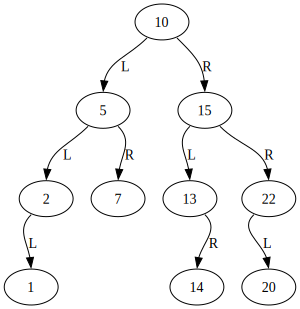

In [52]:
root.visualize()

In [53]:
root.preorder(tree=root)

[10, 5, 2, 1, 7, 15, 13, 14, 22, 20]

In [41]:
root.inorder(tree=root)

[1, 2, 5, 7, 10, 13, 14, 15, 20, 22]

In [42]:
root.postorder(tree=root)

[1, 2, 7, 5, 14, 13, 20, 22, 15, 10]

In [56]:
root.contains(20)
root.contains(100)

AttributeError: 'NoneType' object has no attribute 'value'